<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/genetic_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---



# Genetic algorihtms

A genetic algorithm is a class of adaptive stochastic optimization algorithms involving search and optimization. Genetic algorithms were first used by Holland (1975).

The basic idea is to try to mimic a simple picture of natural selection in order to find a good algorithm. The first step is to mutate, or randomly vary, a given collection of sample individuals (solutions). The second step is a selection step, which is often done through measuring against a fitness function. The process is repeated until a suitable solution is found.

There are a large number of different types of genetic algorithms. The step involving mutation depends on how the sample programs are represented, as well as whether the programmer includes various crossover techniques. The test for fitness is also up to the programmer.

Holland created an electronic organism as a binary string ("chromosome"), and then used genetic and evolutionary principles of fitness-proportionate selection for reproduction (including random crossover and mutation) to search enormous solution spaces efficiently.

### Pseudocode:

![](https://i0.wp.com/fernandojimenezmotte.com/wp-content/uploads/2018/03/GA1.jpg?zoom=1.5&resize=358%2C278)

```text

Variables
  pop_size: population size
  ind_size: individual length
  mut_prob: mutation probability
  generations: number of generations to be evolved

Start with a populuation of size pop_size

FOR gi=1:generations
  Evaluate fitness for each individual in the population.
  Transform the fitness evaluation into a probability to be chosen.
  FOR ii=1:pop_size/2
    Select parents: pairs of individuals according to their probability
    Cross the two selected Parents to get two Childs
    Mutate the two generated Childs
  ENDFOR
  Overwrite the population of Parents with the Childs
ENDFOR

Notes:
  - A population is a collection of individuals.
  - An individual (chromosome) is a collection of genes

```

### Individuals (chromosome coding)

![](https://i2.wp.com/fernandojimenezmotte.com/wp-content/uploads/2018/03/GA2.png?w=556)

### Genetic operators

- Selection

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/7762.Fig2.png)

- Crossover

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/1616.Fig3.png)

- Mutation

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/7367.Fig4.png)

Resources:

- https://improperprior.com/post/2020/05/20/formula-1-and-genetic-algorithms-p1/
- https://natureofcode.com/book/chapter-9-the-evolution-of-code/
- **(Also take a look at)** https://anaconda.org/marsgr6/genetic_algorithm/notebook

## Find the optimum (maximum) of the following function

$$f(x) = -(sin(x-10) + 0.05\times(x-10)^2) + 10, \text{ subject to the constraint that } 0 \leq x \leq 20$$

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [ ]:
# Functions Declarations

def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10


def min_max_normalization(x, min_x, max_x, a, b):
    return a + ((x-min_x)*(b-a)) / (max_x - min_x)

# fitness function
def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10

def change_gene(gene, p_mut=0):
    gene = int(gene)
    if np.random.random() < p_mut:
        gene ^= 1

    return str(gene)

def mutate(individual, p_mut=0):
    return ''.join([change_gene(c, p_mut) for c in individual])

(array([8.57244857]), 10.88786282657364, 1999999)

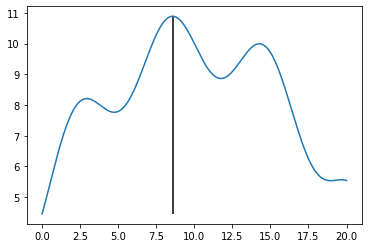

In [ ]:

# Code here
a, b = 0, 20
epsilon = 0.00001  # This the error we want to allow
x = np.linspace(a, b, int((b-a)/epsilon))


y = f(x)

#auxiliar variables to graph
vX = x
vY = y

plt.plot(x, y)
len(x)
max_x, max_y = x[np.where(y == y.max())], y.max()
plt.vlines(max_x, y.min(), max_y, 'k')
max_x, max_y, len(x)

- Individuals' coding
  - The individuals are binary with a given lenghth $l$.
  - We must transform the binary vector to a numeric vector, between 0 and a maximum $2^l-1$.
  - We may need to scale the individuals between the minimun and maximum values in $x$.
    - Min-max normalization:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/73032b45bffd5e5140483fbe1ed49bf174f1962d)

(8.561837186236362, 10.887801448528219)

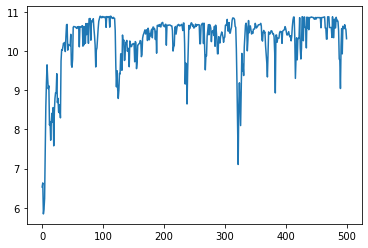

In [ ]:
pop_size = 10
ind_size = 16
generations = 500
mutation_probability = 0.01

a, b = 0, 20

min_value, max_value = int('0'*ind_size, 2), int('1'*ind_size, 2)

population = bernoulli.rvs(p=0.1, size=(pop_size, ind_size))
pop_str = [''.join(ind.astype('str')) for ind in population]

pop_dec = np.array([int(ind, 2) for ind in pop_str])
pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)

f_mean = [f(pop_norm).mean()]
x = []

timeGenerations = [0, 20, 40, 60, 80, 100]
bestIndividuals = [] #array to store best individuals from each generation

for gi in range(generations):
    pop_fitness = f(pop_norm)
    pop_probability = pop_fitness / pop_fitness.sum()

    # childs
    new_pop = []
    for i in range(pop_size//2):
        parents = np.random.choice(pop_str, p=pop_probability, size=2)
        cross_point = np.random.randint(ind_size)
        child1 = parents[0][:cross_point] + parents[1][cross_point:]
        child2 = parents[1][:cross_point] + parents[0][cross_point:]
        new_pop += [child1, child2]
    pop_str = [mutate(individual, mutation_probability) for individual in new_pop]
    pop_dec = np.array([int(ind, 2) for ind in pop_str])
    pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)
    x += [pop_norm[np.where(pop_norm == pop_norm.max())[0][0]]]  # best ind of the pop

    if gi in timeGenerations:
      bestIndividuals += [pop_norm] #appending those best values using pop_norm

    f_mean += [f(pop_norm).mean()]

plt.plot(f_mean)
x[np.where(f(np.array(x)) == f(np.array(x)).max())[0][0]], f(np.array(x)).max()

In [ ]:
x[np.where(f(np.array(x)) == f(np.array(x)).max())[0][0]], f(np.array(x)).max()

(7.771114671549554, 10.542765963212549)

#DEBER AUTONOMO

* Dibujar (en un gráfico) con las mejores soluciones en X para cada generación y como tiende al valor óptivo (vea la línea vertical negra en el primer gráfico).
 * Vea el gráfico para la media de soluciones f(X).

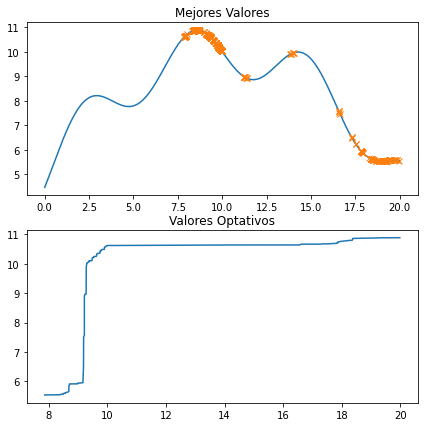

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.subplot(211)
plt.title('Mejores Valores')
plt.plot(vX, vY)
plt.plot(x, f(np.array(x)), "x")

#Variables to graph trending line

values = list(f(np.array(x)))
lineaOptativa = [x[values.index(f(xi))] for xi in x]

newX = np.unique(lineaOptativa)
newY = np.unique(f(newX))

plt.subplot(212)
plt.title('Valores Optativos')
plt.plot(newX, newY)

* Dibujar las soluciones individuales en el tiempo, 10 individuos de la población como una pareja de valores x, fx(x) (generación 0, 20, 40, 60, 80, 100, o escoja valores adecuados).
 * Vea: [Generations Image](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/ga01.png)

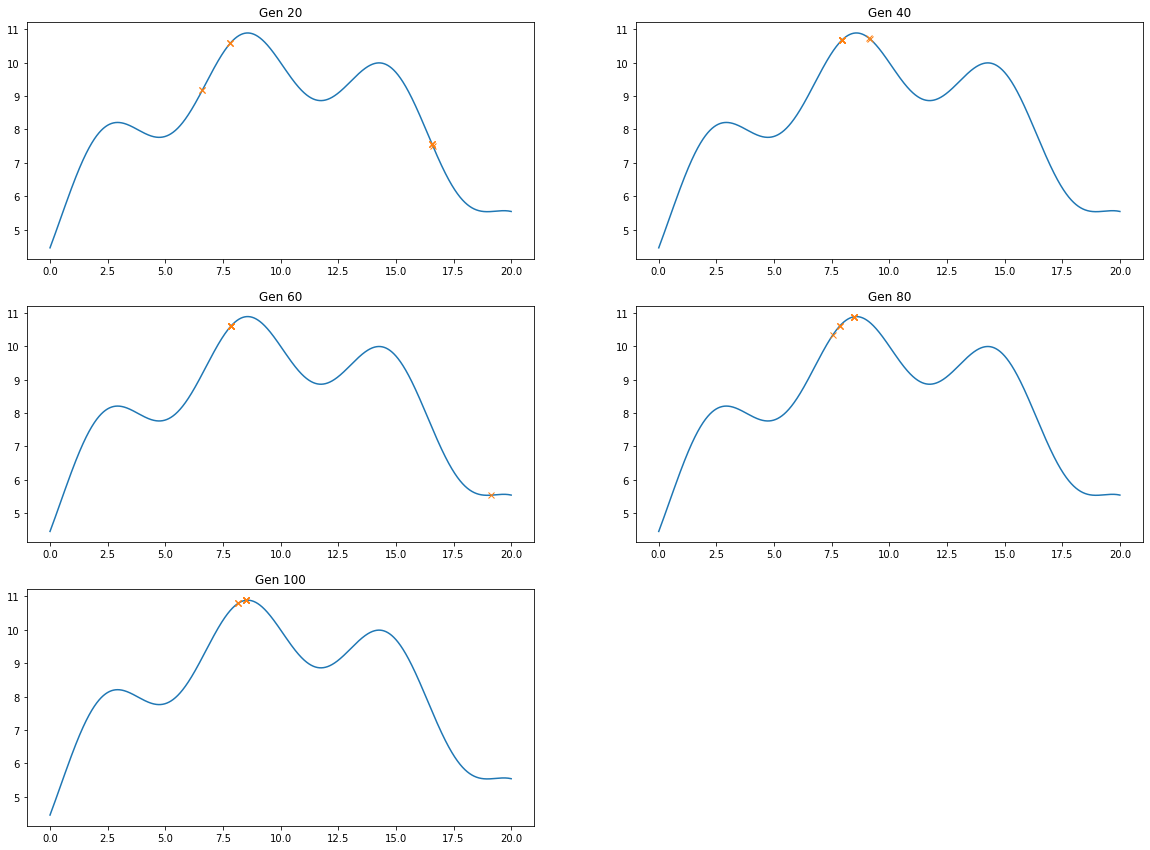

In [ ]:
plt.figure(figsize=(20,20))
for i in range(1, len(timeGenerations)):
  plt.subplot(4, 2, i);
  plt.title("Gen " + str(timeGenerations[i]))
  plt.plot(vX, vY)
  plt.plot(bestIndividuals[i], f(np.array(bestIndividuals[i])),"x")



* Devuelva el mejor valor de X encontrada por el algoritmos genético, donde f(X) es el máximo (esta es la solución al problema).

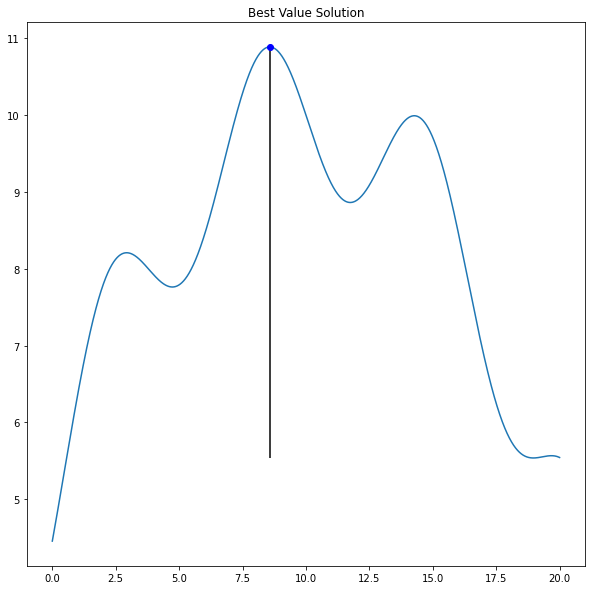

In [ ]:
yFunc = f(np.array(x))

plt.figure(figsize=(10,10))

plt.title('Best Value Solution')
plt.plot(vX, vY)

len(x)
max_x, max_y = x[np.where(yFunc == yFunc.max())[0][0]], yFunc.max()
plt.vlines(max_x, yFunc.min(), max_y, 'k')

plt.plot(max_x, max_y, 'bo')

